# Microsoft Studios - EDA & Recommendations 

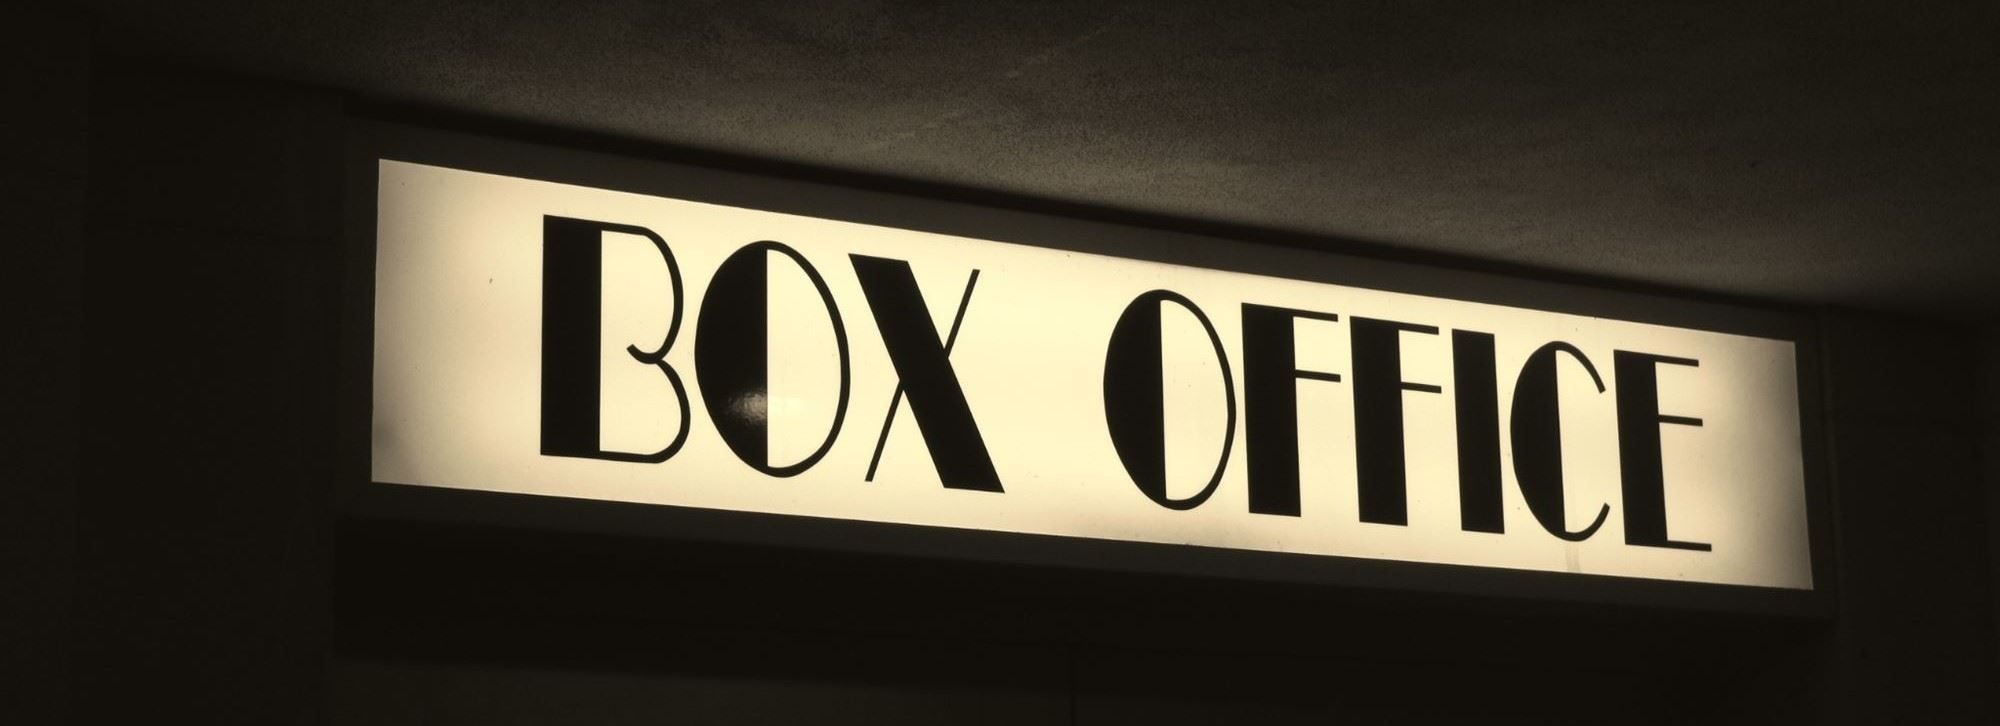

Mark Prettyman

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
bom_movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
rt_movie_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter="\t")
movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

In [3]:
! unzip -n zippedData/im.db.zip

Archive:  zippedData/im.db.zip


In [4]:
conn = sqlite3.connect("im.db")
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)

## Executive Summary

Microsoft wishes to launch a movie studio in a densely competitive environment in which include big names like Disney and Universal Studios are industry behemoths, well established through decades and in some cases, almost a century or more of film making experience. It needs to attract its own customer base by releasing attractive, appealing, and successful movies.

This analysis presented by Mark Prettyman outlines statistical data gathered from box office movies. This EDA utlizes several CSV/TSV formatted datasets, with calls to one SQL database. Descriptive features that are used in this analysis of titles include box office domestic and foreign, production studio, genre, number of reviews/votes and an engineered 'net' that subtracts production costs from gross revenue.

Data gathered indicated a negative correlation with advancing time to number of movies released per year. Despite this, it was also found that the total gross for all movies produced had a positive correlation with advancing time; that is, year after year, the total amount of revenue made from movies has increased, despite fewer movies being released each year.

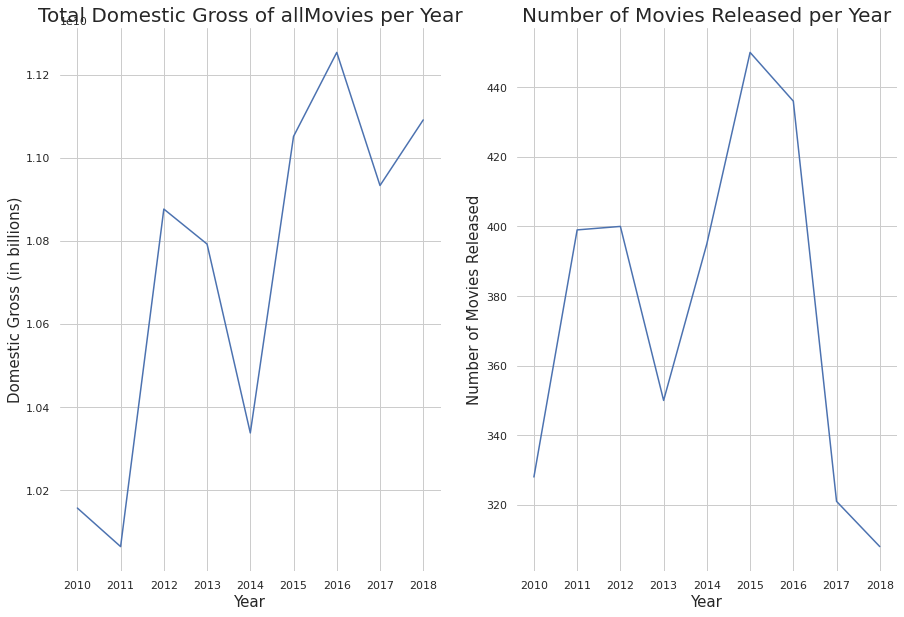

In [5]:
year = bom_movie_gross.groupby(by=['year']).sum()
sum_year = bom_movie_gross['year'].value_counts().sort_index()

sns.set_theme(style='whitegrid')

f, axes = plt.subplots(1, 2, figsize=(15, 10))
sns.despine(f, left=True, bottom=True)

year_graph = sns.lineplot(x='year',
                          y='domestic_gross',
                          data=year,
                          ax=axes[0]
                         )
year_graph.set_xlabel("Year", fontsize = 15)
year_graph.set_ylabel("Domestic Gross (in billions)", fontsize = 15)
year_graph.set_title('Total Domestic Gross of allMovies per Year', fontsize = 20)

sum_year_graph = sns.lineplot(data=sum_year,
                              ax=axes[1]
                             )
sum_year_graph.set_xlabel("Year", fontsize = 15)
sum_year_graph.set_ylabel("Number of Movies Released", fontsize = 15)
sum_year_graph.set_title('Number of Movies Released per Year', fontsize = 20)

plt.savefig('yeargraph.jpg')

It is a prime oppurtunity for Microsoft to establish itself in the movie studio industry. Here, the analysis garnered 3 actionable recommendations for Microsoft:

1. Microsoft should incorporate a live-action animated movie studio into their entry into the movie production business.
2. Microsoft should attempt to acquire rights to one of three Disney-owned franchises: Star Wars, Marvel, Jurassic Park. (Originally, Pixar was considered; however, there is something uniquely 'Disney' about Pixar.
3. Microsoft should consider producing a drama series on the small screen and sell its rights to a streaming network, perhaps, a spin-off to a successful movie it produces.

The data gathered, parsed, and analyzed support these recommendations. The following section are the methods used to analyze the given CSV/df resources:

## The Data

In [6]:
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


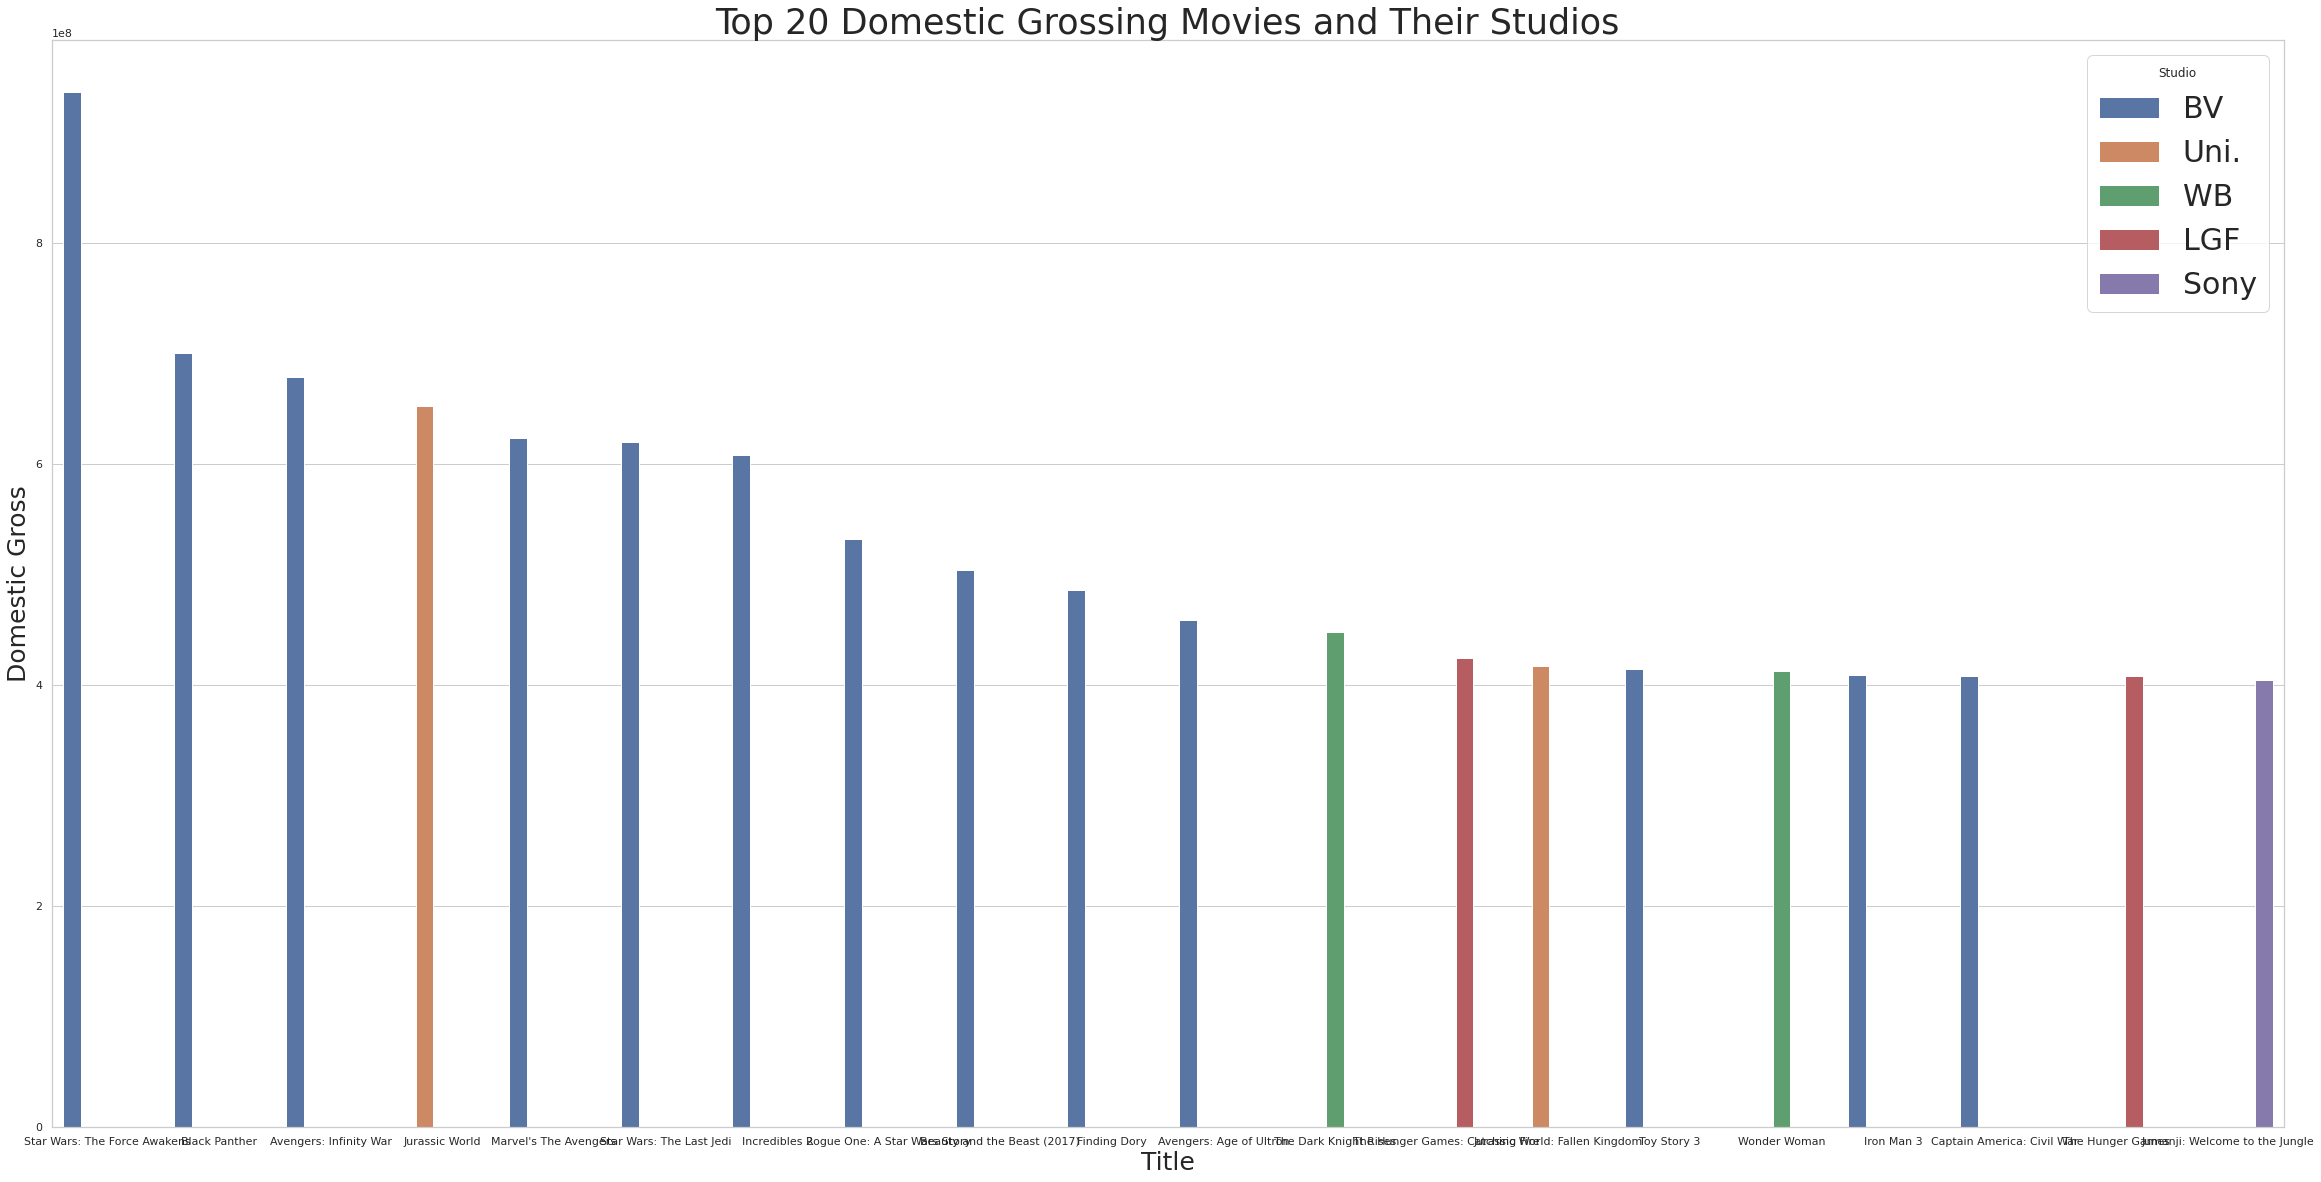

In [7]:
top_20 = bom_movie_gross.sort_values(by=['domestic_gross'], ascending=False).head(20)

f, ax = plt.subplots(figsize=(40, 20))
sns.set_theme(style='whitegrid')

sns.barplot(x='title',
            y='domestic_gross',
            hue='studio',
            data=top_20)
ax.set_title("Top 20 Domestic Grossing Movies and Their Studios", fontsize=35)
ax.set_xlabel("Title", fontsize=25)
ax.set_ylabel("Domestic Gross", fontsize=25)
ax.legend(title='Studio', 
          loc='upper right',
          prop={'size':30}
          )

plt.savefig('top20.jpg')
         

Studio Reference:
- BV = Disney
- Uni. = Universal
- WB = Warner Brothers
- LGF = Lionsgate Films

**Analysis** - Most of the top 20 titles by domestic gross are from Disney, whose largest genre of film is *animation*. This will be explored later in the notebook.

The follwing two df address the mean gross values from movies per studio, and the total gross each studio has produced.

In [8]:
studio_total = bom_movie_gross.groupby(['studio']).sum()
studio_total.drop('year', axis=1, inplace=True)
d = studio_total.sort_values(by=['domestic_gross'], ascending=False).head(10)

In [9]:
d

,domestic_gross
studio,
BV,1.841903e+10
Uni.,1.290239e+10
WB,1.216805e+10
Fox,1.094950e+10
Sony,8.459683e+09
Par.,7.685871e+09
LGF,4.118963e+09
WB (NL),3.995700e+09
LG/S,2.078200e+09


<AxesSubplot:title={'center':'Total Domestic Gross per Studio'}, xlabel='Studio', ylabel='Total Domestic Gross (in tens of billions)'>

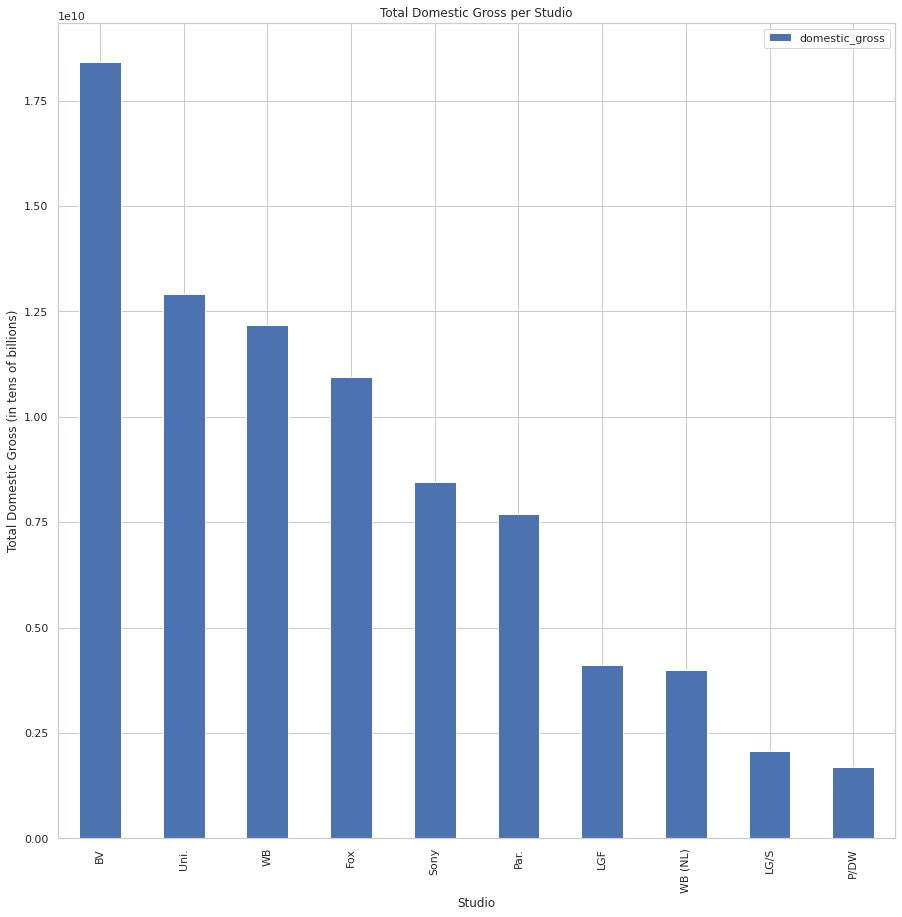

In [10]:
d.plot(kind='bar',
       figsize=(15,15),
       xlabel='Studio',
       ylabel='Total Domestic Gross (in tens of billions)',
       title='Total Domestic Gross per Studio')


In [11]:
# THIS CELL IS BLANK

In [12]:
# THIS CELL IS BLANK

In [13]:
# THIS CELL IS BLANK

**Analysis** - These are the top 10 domestic grossing studios.

- Disney currently holds the rights to *Star Wars*, *Marvel*, and *Jurrasic Park*.

Top 10 Movie Studios by total Domestic Gross

1. BV (Disney)
2. Uni. (Universal Pictures)
3. WB Warner Bros
4. Fox Studios
5. Sony Pictures
6. Par. (Paramount)
7. LGF (Lionsgate Films)
8. Warner Bros
9. Lionsgate
10. Dreamworks

In [14]:
movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [15]:
movie_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [16]:
movie_budgets.production_budget = movie_budgets.production_budget.apply(lambda x: x.strip('$').replace(',', '')).astype(float)

In [17]:
movie_budgets.domestic_gross = movie_budgets.domestic_gross.apply(lambda x: x.strip('$').replace(',', '')).astype(float)

In [18]:
movie_budgets.worldwide_gross = movie_budgets.worldwide_gross.apply(lambda x: x.strip('$').replace(',', '')).astype(float)

In [19]:
movie_budgets.dtypes

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [20]:
movie_budgets['total_gross'] = movie_budgets['domestic_gross'] + movie_budgets['worldwide_gross']
movie_budgets['net'] = movie_budgets['total_gross'] - movie_budgets['production_budget']
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000e+00,-7.000000e+03
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.889770e+05,2.829770e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2.676000e+03,-2.324000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.000000e+00,-1.400000e+03


In [21]:
genres_studio = movie_budgets.merge(bom_movie_gross, left_on='movie', right_on='title' ).drop_duplicates(subset='movie')
genres_studio

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,total_gross,net,title,studio,domestic_gross_y,foreign_gross,year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.726950e+09,2.426950e+09,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
3,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,8.849695e+08,5.849695e+08,Justice League,WB,229000000.0,428900000,2017
4,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,1.079695e+09,7.796951e+08,Spectre,Sony,200100000.0,680600000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,68,"Apr 27, 2012",Sound of My Voice,135000.0,408015.0,4.294480e+05,8.374630e+05,7.024630e+05,Sound of My Voice,FoxS,408000.0,NaN,2012
1243,73,"Jun 15, 2012",Your Sister's Sister,120000.0,1597486.0,3.090593e+06,4.688079e+06,4.568079e+06,Your Sister's Sister,IFC,1600000.0,NaN,2012
1244,80,"Jul 10, 2015",The Gallows,100000.0,22764410.0,4.165647e+07,6.442088e+07,6.432088e+07,The Gallows,WB (NL),22800000.0,20200000,2015
1245,86,"Jul 7, 2017",A Ghost Story,100000.0,1594798.0,2.769782e+06,4.364580e+06,4.264580e+06,A Ghost Story,A24,1600000.0,NaN,2017


In [22]:
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


Expanding to provide genre breakdown..

In [23]:
movie_basics['genre_list'] = movie_basics['genres'].str.split(',')
movie_basics.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'genre_list'],
      dtype='object')

In [24]:
df = movie_basics.merge(movie_budgets, left_on='primary_title', right_on='movie')
# rows with missing values checked. amount negligible enough to not be pertinent to analysis.
df = df.dropna()

Splicing induvidual genre for counting:

In [25]:
exploded = df.explode('genre_list')
exploded

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre_list,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Action,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,73706.0,-44926294.0
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Animation,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,73706.0,-44926294.0
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Comedy,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,73706.0,-44926294.0
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",Comedy,21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0,2275804.0,2075804.0
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",Mystery,21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0,2275804.0,2075804.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,tt9607270,The Blue Bird,The Blue Bird,2015,84.0,Drama,Drama,71,"Jan 1, 1976",The Blue Bird,1200000.0,887000.0,887000.0,1774000.0,574000.0
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",Action,25,"Aug 27, 2008",Traitor,22000000.0,23530831.0,27882226.0,51413057.0,29413057.0
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",Drama,25,"Aug 27, 2008",Traitor,22000000.0,23530831.0,27882226.0,51413057.0,29413057.0
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",Romance,25,"Aug 27, 2008",Traitor,22000000.0,23530831.0,27882226.0,51413057.0,29413057.0


The highest average earning genre after production costs per movie table:

In [26]:
genre_rank = exploded.groupby('genre_list').mean()['net'].sort_values(ascending=False)
genre_rank = genre_rank.to_frame()
genre_rank = genre_rank.reset_index()
genre_rank

,genre_list,net
0,Animation,3.403907e+08
1,Musical,3.241580e+08
2,Adventure,2.979299e+08
3,Sci-Fi,2.593662e+08
4,Fantasy,2.330172e+08
5,Action,1.912350e+08
6,Family,1.821593e+08
7,Comedy,1.177461e+08
8,Sport,8.560848e+07
9,Thriller,8.415720e+07


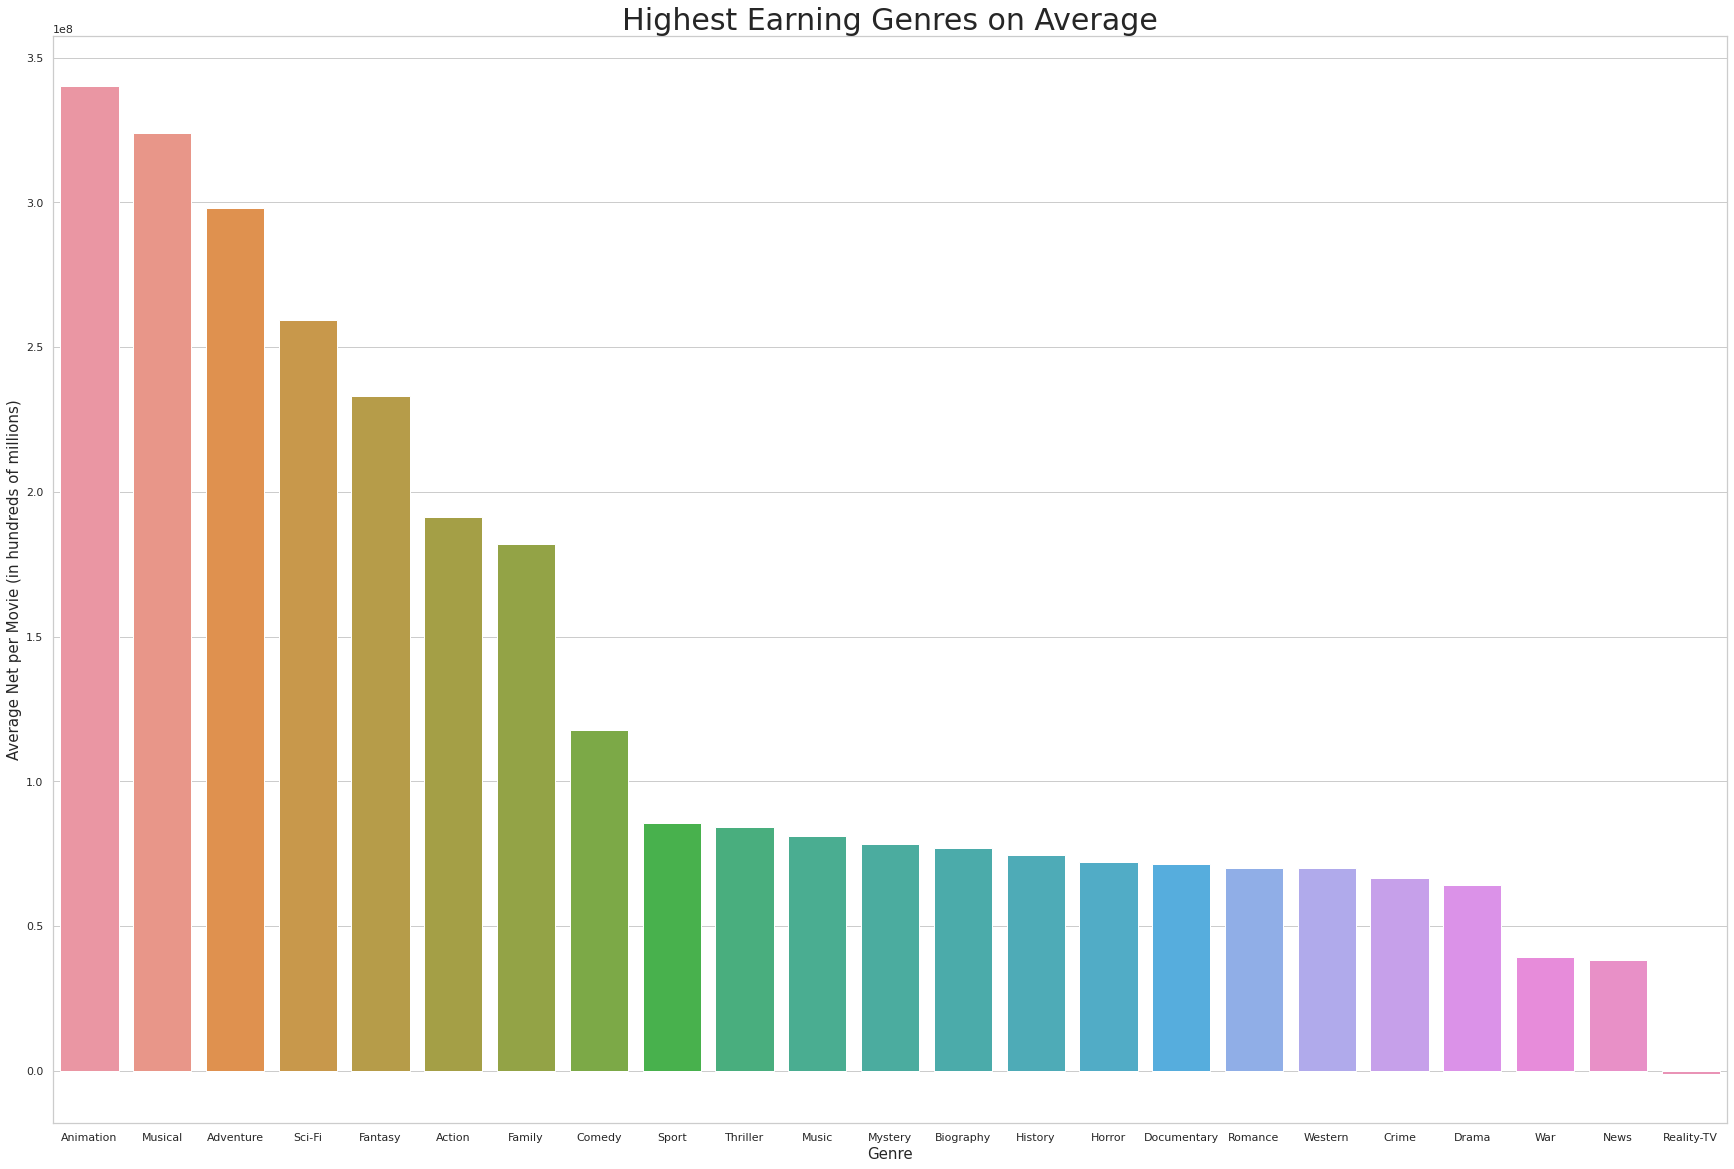

In [27]:
f, ax = plt.subplots(figsize=(30, 20))

ax = sns.barplot(x='genre_list',
                 y='net',
                 data=genre_rank
                )
ax.set_title('Highest Earning Genres on Average', fontsize=30)
ax.set_xlabel('Genre', fontsize=15)
ax.set_ylabel('Average Net per Movie (in hundreds of millions)', fontsize=15)

plt.savefig('genreearnings.jpg')
                


**Analysis** - The table above further reinforces the success of movies released that are animated.

In [28]:
genre_earnings = movie_basics.merge(bom_movie_gross, left_on='primary_title', right_on='title')
genre_earnings = genre_earnings.dropna()
genre_earnings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre_list,title,studio,domestic_gross,foreign_gross,year
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance","[Adventure, Drama, Romance]",On the Road,IFC,744000.0,8000000,2012
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,[Drama],On the Road,IFC,744000.0,8000000,2012
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,[Documentary],On the Road,IFC,744000.0,8000000,2012
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,[Drama],On the Road,IFC,744000.0,8000000,2012
5,tt5389486,On the Road,On the Road,2015,39.0,Documentary,[Documentary],On the Road,IFC,744000.0,8000000,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
3344,tt7752454,Detective Chinatown 2,Tang ren jie tan an 2,2018,121.0,"Action,Comedy,Mystery","[Action, Comedy, Mystery]",Detective Chinatown 2,WB,2000000.0,542100000,2018
3346,tt7784604,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery","[Drama, Horror, Mystery]",Hereditary,A24,44100000.0,35300000,2018
3355,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance","[Comedy, Drama, Romance]",Nobody's Fool,Par.,31700000.0,1800000,2018
3361,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,[Romance],How Long Will I Love U,WGUSA,747000.0,82100000,2018


In [29]:
genre_earnings = genre_earnings.drop_duplicates(subset=['primary_title'])
genre_earnings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre_list,title,studio,domestic_gross,foreign_gross,year
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance","[Adventure, Drama, Romance]",On the Road,IFC,744000.0,8000000,2012
7,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama","[Adventure, Comedy, Drama]",The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
8,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama","[Action, Crime, Drama]",A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
9,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",Jurassic World,Uni.,652300000.0,"1,019.4",2015
10,tt0372538,Spy,Spy,2011,110.0,"Action,Crime,Drama","[Action, Crime, Drama]",Spy,Fox,110800000.0,124800000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
3344,tt7752454,Detective Chinatown 2,Tang ren jie tan an 2,2018,121.0,"Action,Comedy,Mystery","[Action, Comedy, Mystery]",Detective Chinatown 2,WB,2000000.0,542100000,2018
3346,tt7784604,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery","[Drama, Horror, Mystery]",Hereditary,A24,44100000.0,35300000,2018
3355,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance","[Comedy, Drama, Romance]",Nobody's Fool,Par.,31700000.0,1800000,2018
3361,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,[Romance],How Long Will I Love U,WGUSA,747000.0,82100000,2018


In [30]:
genre_earnings = genre_earnings.explode('genre_list')
genre_earnings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre_list,title,studio,domestic_gross,foreign_gross,year
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",Adventure,On the Road,IFC,744000.0,8000000,2012
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",Drama,On the Road,IFC,744000.0,8000000,2012
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",Romance,On the Road,IFC,744000.0,8000000,2012
7,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",Adventure,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
7,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",Comedy,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
3355,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",Drama,Nobody's Fool,Par.,31700000.0,1800000,2018
3355,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",Romance,Nobody's Fool,Par.,31700000.0,1800000,2018
3361,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,Romance,How Long Will I Love U,WGUSA,747000.0,82100000,2018
3365,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",Documentary,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000,2018


In [31]:
genre_data = genre_earnings.groupby('studio').sum().sort_values(by='domestic_gross', ascending=False)
genre_data = genre_data.reset_index()
genre_data = genre_data.drop(columns=['start_year', 'runtime_minutes', 'year'], axis=1)
genre_data = genre_data.head(10)

In [32]:
genre_data

,studio,domestic_gross
0,BV,4.229790e+10
1,Uni.,3.092528e+10
2,Fox,2.705340e+10
3,WB,2.540980e+10
4,Sony,1.848199e+10
5,Par.,1.709613e+10
6,LGF,9.167938e+09
7,WB (NL),8.701900e+09
8,P/DW,4.884200e+09
9,LG/S,3.609600e+09


In [33]:
studio_genre = genre_data.merge(genre_earnings, left_on='studio', right_on='studio')
studio_genre

,studio,domestic_gross_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre_list,title,domestic_gross_y,foreign_gross,year
0,BV,4.229790e+10,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",Adventure,Tangled,200800000.0,391000000,2010
1,BV,4.229790e+10,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",Animation,Tangled,200800000.0,391000000,2010
2,BV,4.229790e+10,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",Comedy,Tangled,200800000.0,391000000,2010
3,BV,4.229790e+10,tt0401729,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",Action,John Carter,73100000.0,211100000,2012
4,BV,4.229790e+10,tt0401729,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",Adventure,John Carter,73100000.0,211100000,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,LG/S,3.609600e+09,tt7242142,Blindspotting,Blindspotting,2018,95.0,"Comedy,Crime,Drama",Comedy,Blindspotting,4300000.0,530000,2018
1913,LG/S,3.609600e+09,tt7242142,Blindspotting,Blindspotting,2018,95.0,"Comedy,Crime,Drama",Crime,Blindspotting,4300000.0,530000,2018
1914,LG/S,3.609600e+09,tt7242142,Blindspotting,Blindspotting,2018,95.0,"Comedy,Crime,Drama",Drama,Blindspotting,4300000.0,530000,2018
1915,LG/S,3.609600e+09,tt7334528,Uncle Drew,Uncle Drew,2018,103.0,"Comedy,Sport",Comedy,Uncle Drew,42500000.0,4200000,2018


In [34]:
studio_genre = studio_genre.drop(columns=['domestic_gross_x', 
                                          'movie_id', 'primary_title',
                                           'original_title',
                                           'start_year',
                                           'runtime_minutes',
                                           'genres',
                                           'domestic_gross_y',
                                           'foreign_gross',
                                           'year'],
                                           axis=1
                                )
studio_genre

,studio,genre_list,title
0,BV,Adventure,Tangled
1,BV,Animation,Tangled
2,BV,Comedy,Tangled
3,BV,Action,John Carter
4,BV,Adventure,John Carter
...,...,...,...
1912,LG/S,Comedy,Blindspotting
1913,LG/S,Crime,Blindspotting
1914,LG/S,Drama,Blindspotting
1915,LG/S,Comedy,Uncle Drew


Creating a pivot table to help display studio to genre counts.

In [35]:
studio_genre = studio_genre.pivot_table(studio_genre,
                         index=['studio', 'genre_list'],
                         aggfunc='count'
                         )
studio_genre

title
studio  genre_list       
BV      Action         30
        Adventure      55
        Animation      23
        Biography       8
        Comedy         34
...                   ...
WB (NL) Music           1
        Musical         1
        Mystery         8
        Romance         9
        Thriller        7

[164 rows x 1 columns]

In [36]:
studio_genre = studio_genre.reset_index()
studio_genre

,studio,genre_list,title
0,BV,Action,30
1,BV,Adventure,55
2,BV,Animation,23
3,BV,Biography,8
4,BV,Comedy,34
...,...,...,...
159,WB (NL),Music,1
160,WB (NL),Musical,1
161,WB (NL),Mystery,8
162,WB (NL),Romance,9


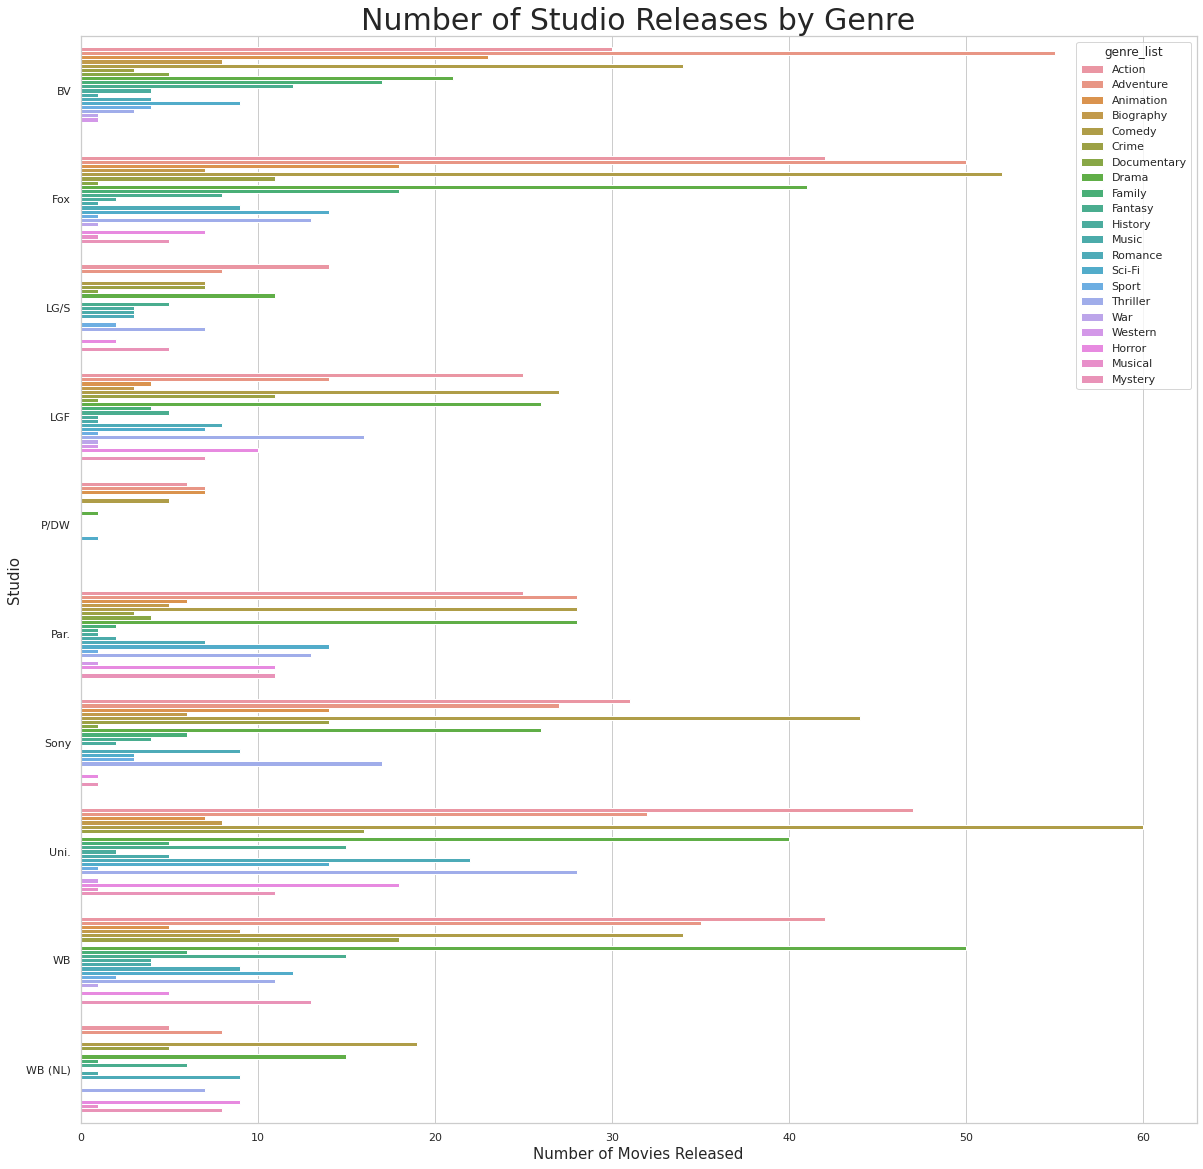

In [37]:
f, ax = plt.subplots(figsize=(20,20))

sns.barplot(x='title',
            y='studio',
            hue='genre_list',
            data=studio_genre)
ax.set_title('Number of Studio Releases by Genre', fontsize=30)
ax.set_xlabel('Number of Movies Released', fontsize=15)
ax.set_ylabel('Studio', fontsize=15)

plt.savefig('studiorelease.jpg')

**Analysis** - This table graphs the number of films released by each studio. Only the top 10 studios by total gross have been selected.

- It is shown that *action* and *adventure* are the two most common films released among these studios, with *animation* trailing close behind.

- Disney (BV) releases around 25 animated movies per year, under half the amount they release as adventure films (around 55)

In [38]:
top_20

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016


Text(0.5, 1.0, 'Top 20 Grossing Movies')

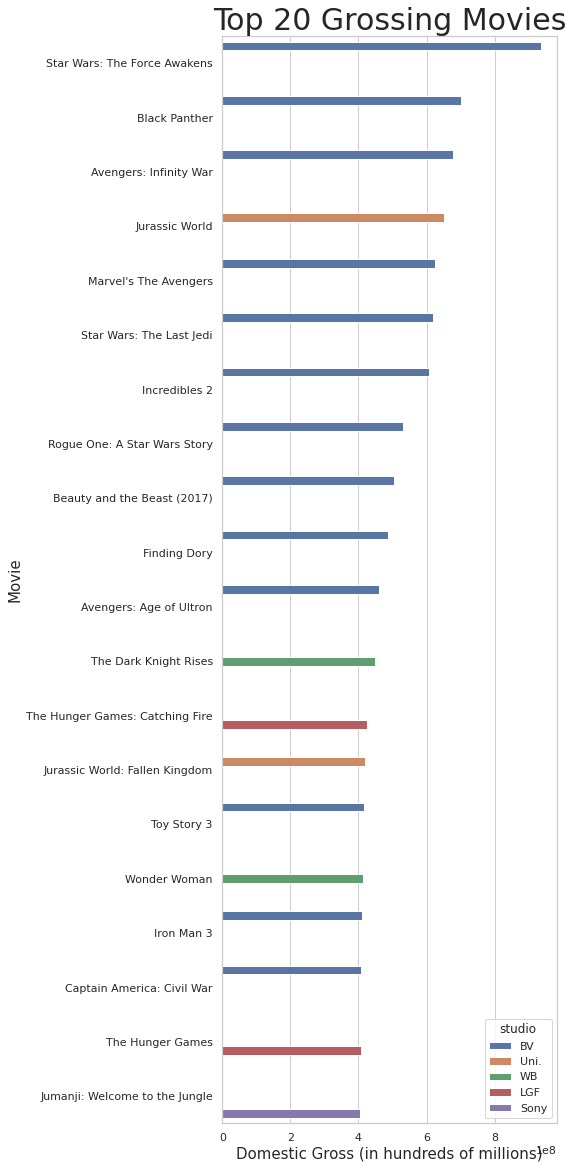

In [39]:
f, ax = plt.subplots(figsize=(6,20))

sns.barplot(x='domestic_gross',
            y='title',
            hue='studio',
            data=top_20)
ax.set_xlabel('Domestic Gross (in hundreds of millions)', fontsize=15)
ax.set_ylabel('Movie', fontsize=15)
ax.set_title('Top 20 Grossing Movies', fontsize=30)

In [40]:
# THIS CELL IS BLANK

**Analysis** - The above table displays the highest average earners by genre.

In [41]:
num_votes = pd.read_sql("""
SELECT primary_title, genres, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
ORDER BY numvotes DESC
""", conn)
num_votes

,primary_title,genres,averagerating,numvotes
0,Inception,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,"Action,Thriller",8.4,1387769
2,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Django Unchained,"Drama,Western",8.4,1211405
4,The Avengers,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...
73851,Columbus,Comedy,5.8,5
73852,BADMEN with a good behavior,"Comedy,Horror",9.2,5
73853,July Kaatril,Romance,9.0,5
73854,Swarm Season,Documentary,6.2,5


Dropping rows with missing values. Amount of rows w/ missing values negligible.

Engineering *genre_list* feature to break down genres in preparation of groupby analysis

In [42]:
num_votes.dropna()
num_votes['genre_list'] = num_votes['genres'].str.split(',')
num_votes

,primary_title,genres,averagerating,numvotes,genre_list
0,Inception,"Action,Adventure,Sci-Fi",8.8,1841066,"[Action, Adventure, Sci-Fi]"
1,The Dark Knight Rises,"Action,Thriller",8.4,1387769,"[Action, Thriller]"
2,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334,"[Adventure, Drama, Sci-Fi]"
3,Django Unchained,"Drama,Western",8.4,1211405,"[Drama, Western]"
4,The Avengers,"Action,Adventure,Sci-Fi",8.1,1183655,"[Action, Adventure, Sci-Fi]"
...,...,...,...,...,...
73851,Columbus,Comedy,5.8,5,[Comedy]
73852,BADMEN with a good behavior,"Comedy,Horror",9.2,5,"[Comedy, Horror]"
73853,July Kaatril,Romance,9.0,5,[Romance]
73854,Swarm Season,Documentary,6.2,5,[Documentary]


In [43]:
genre_votes = num_votes.explode('genre_list')
genre_votes

,primary_title,genres,averagerating,numvotes,genre_list
0,Inception,"Action,Adventure,Sci-Fi",8.8,1841066,Action
0,Inception,"Action,Adventure,Sci-Fi",8.8,1841066,Adventure
0,Inception,"Action,Adventure,Sci-Fi",8.8,1841066,Sci-Fi
1,The Dark Knight Rises,"Action,Thriller",8.4,1387769,Action
1,The Dark Knight Rises,"Action,Thriller",8.4,1387769,Thriller
...,...,...,...,...,...
73852,BADMEN with a good behavior,"Comedy,Horror",9.2,5,Comedy
73852,BADMEN with a good behavior,"Comedy,Horror",9.2,5,Horror
73853,July Kaatril,Romance,9.0,5,Romance
73854,Swarm Season,Documentary,6.2,5,Documentary


In [44]:
genre_votes_plot = genre_votes.groupby('genre_list')['numvotes'].sum().sort_values(ascending=True)
genre_votes_plot

genre_list
Short                  8
Adult                164
Reality-TV           459
Game-Show           3469
News              123319
Musical          1387965
Western          2452376
War              2684725
Sport            3755824
Documentary      4739345
Music            5453369
History          7843349
Family           8636710
Animation       15353302
Biography       21609446
Horror          23884695
Mystery         24657286
Fantasy         26335704
Romance         26913873
Crime           39631356
Sci-Fi          42960289
Thriller        48155313
Comedy          74305805
Adventure       84232589
Action         101161682
Drama          119567500
Name: numvotes, dtype: int64

<AxesSubplot:title={'center':'Number of Votes by Genre (in hundred millions)'}, ylabel='Genre'>

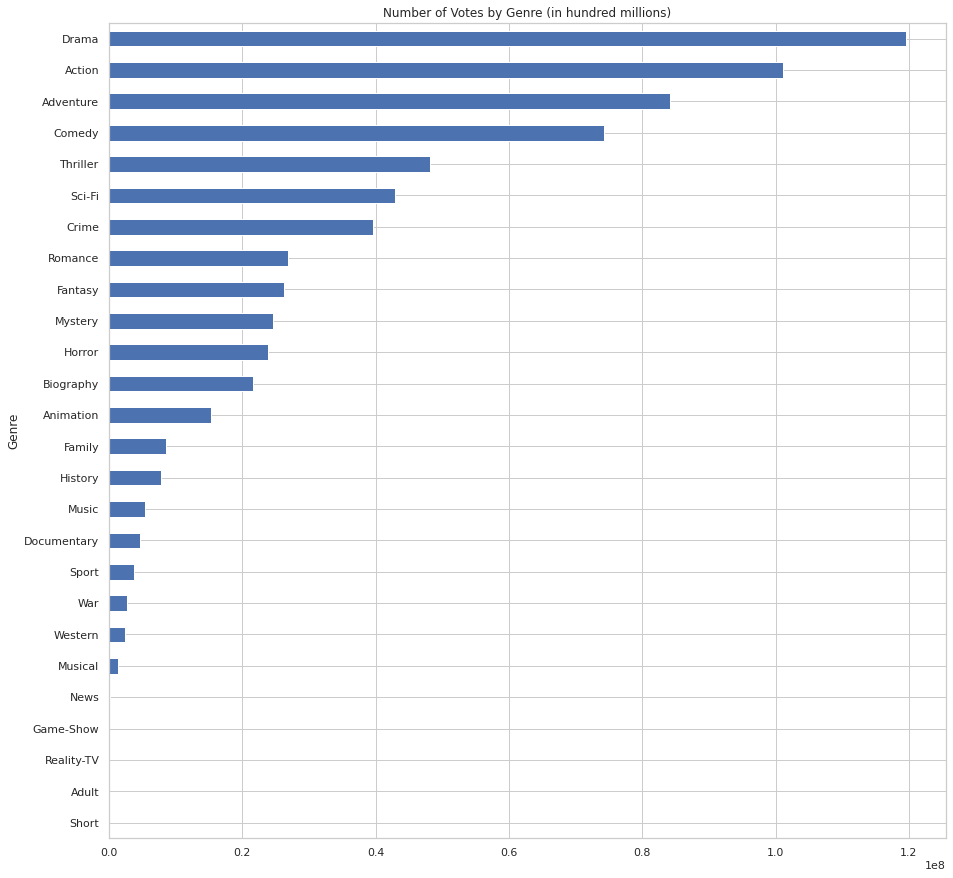

In [45]:
genre_votes_plot.plot(kind='barh', 
                      title='Number of Votes by Genre (in hundred millions)', 
                      xlabel='Genre',
                      ylabel='Number of Votes',
                      figsize=(15,15))

In [46]:
# THIS CELL IS BLANK

**Analysis** - This table organizes genres by the number of votes they receive (not the quality of the vote, just that it had received a vote of any kind). 
- Drama leads the pack at nearly one hundred twenty million voters.

## Methods

The qualifiers of success I am using in this analysis assumes:

- The higher grossing a movie is, the more successful it is. Most of the analysis focuses on the top 20 grossing  movies.
- Domestic Gross is used for analysis in most cases. The only time foreign gross was used was to calculate net revenue after production costs. The choice was made due to the fact that Microsoft's home market will be the United States. In order to reduce noise and limit influence of unwanted variables, foreign gross was not factored into analysis.
- Another qualifier of success is the amount of votes a movie receives. If a movie affects its audience enough to not only consume the content, but interact with it by giving it a vote representative of how they feel, then we can assume that the movie caused some sort of reaction or effect in its audience.

Several CSV/TSV files were used in this EDA/recommendation. All were converted into DataFrame type objects, whose features were subsequently grouped, mathematically operated on, and visualized to provide analysis to support the recommendations.

1. Genre breakdown was particularly important in this analysis. The gross data per genre and the studio breakdown were observed in this case to support certain conclusions about certain genres.
2. We also looked at a sample size of the top 20 domestic grossing films released. This data directly backs one recommendation, while slightly lending to the others. I believe there is something of value to be extracted from the info about these 20 films.
3. To emphasize the strength of these recommendations, it is shown early in the Executive Summary that less films on average are being released as time goes on; yet, the domestic gross for the films released continues to climb as time does the same. This factors out the assumption that more movies released per year may be contributing to a higher overall domestic gross, which would skew our analysis.

## Recommendations

The three business proposals for Microsoft are:

1. Microsoft should incorporate a live-action animated movie studio into their entry into the movie production business.

2. Microsoft should attempt to acquire rights to one of three Disney-owned franchises: Star Wars, Marvel, Jurassic Park. (Originally, Pixar was considered; however, there is something uniquely 'Disney' about Pixar.

3. Microsoft should consider producing a drama series on the small screen and sell its rights to a streaming network, perhaps, a spin-off to a successful movie it produces.


The Animation genre is very well represented in this analysis, whether the breakdown is by highest gross or number of films released per studio. Many successful studios release very successful blockbusters that are animated, along with Action/Adventure movies.

Disney is shown here to be a very successful movie studio, having produced more than half of the 20 top grossing films. Disney is also well represented in the Animated Genre breakdown, along with simply being the highest grossing on average and by sum studio.

Disney currently owns the intellectual rights to three franchises:
- Star Wars
- Marvel
- Jurrassic Park

Besides having released blockbusters which are household names, the data here firmly supports the success of movies which belong to these franchises. Microsoft is a company who can enter this industry with a lot of capital.
Which is why I suggest purchasing the rights to one of these franchises. Owning the intellectual property gives our directors, producers, and graphic design teams a strong product with a loyal customer base.



It was found in this analysis the the Drama genre received the most amount of interaction from viewers by way of voting than any other genre. In methods, it was discussed that a qualifier of success would be the number of votes a movie received, because I believed if an audience was compelled to give a vote, they must've been affected enough to do so, and therefore, the movie had an impact, whether positive or negative.
Here I am suggesting a spin-off series, as this could capitalize a successful franchise Microsoft launches and continue its storyline on the small screen. We have seen small screen hits in the last decade like *Stranger Things* and *Euphoria* (both of which fall under the 'Drama' genre) become cultural phenomena.
I believe it is in Microsoft's best interest as it launches its studio to produce and direct a spin-off Drama and sell its rights to a streaming network. This way Microsoft saves money on distibution and logistics, while also reaching a customer base that has never been introduced to Microsoft in this context before.

In [47]:
conn.close()